In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


In [4]:
test_file = h5py.File('/storage/agrp/zivka/umami_Tau/UPP/umami-preprocessing/upp/output_1/pp_output_test.h5', 'r') 
bkg1 = h5py.File('/storage/agrp/dreyet/GNtau/samples/DeepSet_training/hdf5/bkg1P_test_R22_%d.h5', 'r',  driver='family')#, memb_size = 0) 
bkg3 = h5py.File('/storage/agrp/dreyet/GNtau/samples/DeepSet_training/hdf5/bkg3P_test_R22_%d.h5', 'r',  driver='family')#, memb_size = 0)   


In [5]:
test_file['tracks'][0].dtype

dtype([('beamSpotWeight', '<f4'), ('TruthType', '<f4'), ('NewTruthType', '<f4'), ('truthJetType', '<f4'), ('z0sinthetaSigTJVA', '<f4'), ('z0sinthetaTJVA', '<f4'), ('d0SigTJVA', '<f4'), ('d0TJVA', '<f4'), ('z0TJVA', '<f4'), ('dz0_TV_PV0', '<f4'), ('log_sumpt_TV', '<f4'), ('log_sumpt2_TV', '<f4'), ('log_sumpt_PV0', '<f4'), ('log_sumpt2_PV0', '<f4'), ('isLRT', '<f4'), ('jetSeedPt', '<f4'), ('jetSeedEta', '<f4'), ('jetSeedPhi', '<f4'), ('tauPt', '<f4'), ('tauEta', '<f4'), ('tauPhi', '<f4'), ('dEtaJetSeedAxis', '<f4'), ('dPhiJetSeedAxis', '<f4'), ('dRJetSeedAxis', '<f4'), ('tauPtIntermediateAxis', '<f4'), ('dRIntermediateAxis', '<f4'), ('tauPtDetectorAxis', '<f4'), ('dRDetectorAxis', '<f4'), ('rConv', '<f4'), ('rConvII', '<f4'), ('charge', '<f4'), ('tauTruthCharge', '<f4'), ('tauTruthProng', '<f4'), ('tauTruthDecayMode', '<f4'), ('truthParticleOrigin', '<f4'), ('truthParticleType', '<f4'), ('trackPt', '<f4'), ('trackEta', '<f4'), ('trackPhi', '<f4'), ('truthE', '<f4'), ('numberOfInnermostPi

In [6]:
test_file['jets'][0].dtype

dtype([('TAU_centFrac', '<f4'), ('TAU_sumEMCellEtOverLeadTrkPt', '<f4'), ('TAU_dRmax', '<f4'), ('TAU_trFlightPathSig', '<f4'), ('TAU_etOverPtLeadTrk', '<f4'), ('TAU_ptRatioEflowApprox', '<f4'), ('TAU_mEflowApprox', '<f4'), ('TAU_massTrkSys', '<f4'), ('TAU_SumPtTrkFrac', '<f4'), ('TAU_EMPOverTrkSysP', '<f4'), ('TAU_isolFrac', '<f4'), ('TAU_RNNJetScore', '<f4'), ('TAU_RNNJetScoreSigTrans', '<f4'), ('HadronConeExclTruthLabelID', '<f4'), ('pt', '<f4'), ('absEta', '<f4'), ('eventNumber', '<f4'), ('flavour_label', '<i4')])

In [7]:
bkg1.keys()

<KeysViewHDF5 ['TauClusters', 'TauJets', 'TauTracks']>

In [8]:
bkg1['TauJets'].keys()

<KeysViewHDF5 ['EMPOverTrkSysP', 'PanTau_DecayMode', 'RNNJetScore', 'RNNJetScoreSigTrans', 'SumPtTrkFrac', 'absipSigLeadTrk', 'beamSpotWeight', 'centFrac', 'dRmax', 'etOverPtLeadTrk', 'eta', 'etaJetSeed', 'innerTrkAvgDist', 'mEflowApprox', 'massTrkSys', 'mcEventNumber', 'mcEventWeight', 'mu', 'nTracks', 'nVtxPU', 'phi', 'phiJetSeed', 'pt', 'ptIntermediateAxis', 'ptJetSeed', 'ptRatioEflowApprox', 'trFlightPathSig']>

In [9]:
bkg1['TauTracks'].keys()

<KeysViewHDF5 ['chargedScoreRNN', 'conversionScoreRNN', 'd0SigTJVA', 'd0TJVA', 'dEta', 'dPhi', 'eta', 'fakeScoreRNN', 'isolationScoreRNN', 'nInnermostPixelHits', 'nPixelHits', 'nSCTHits', 'phi', 'pt', 'z0sinthetaSigTJVA', 'z0sinthetaTJVA']>

In [18]:
BKG_lst = ['RNNJetScore', 'RNNJetScoreSigTrans','eta','pt','chargedScoreRNN', 'conversionScoreRNN', 'fakeScoreRNN', 'isolationScoreRNN' ]
TEST_lst = ['TAU_RNNJetScore','TAU_RNNJetScoreSigTrans','absEta','pt','rnn_chargedScore', 'rnn_conversionScore','rnn_fakeScore' ,'rnn_isolationScore' ]

In [19]:
jet_flav = test_file['jets']['HadronConeExclTruthLabelID']
is_bkg = jet_flav == 0
track_scores = [test_file['tracks']['rnn_fakeScore'], test_file['tracks']['rnn_chargedScore'], test_file['tracks']['rnn_isolationScore'], test_file['tracks']['rnn_conversionScore']]
prongs = np.sum(np.argmax(np.stack(track_scores,axis=-1), axis=-1)==1, axis=-1)


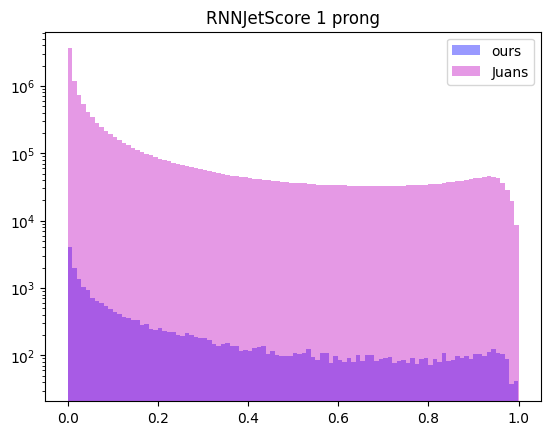

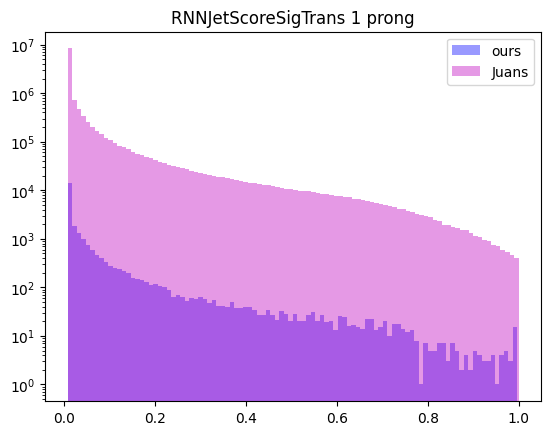

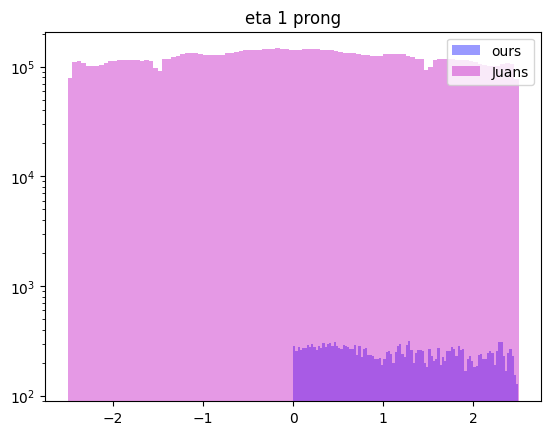

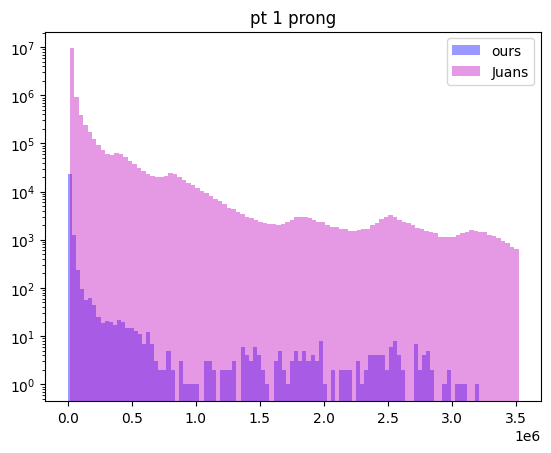

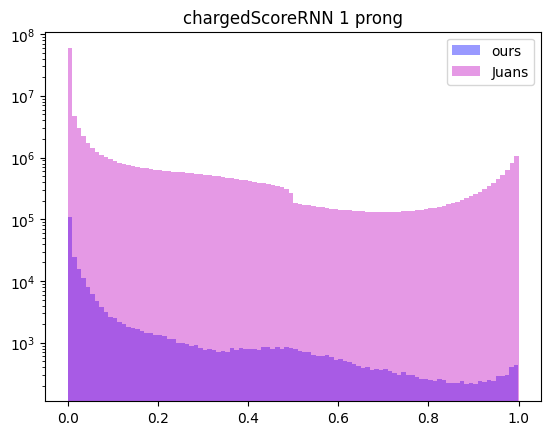

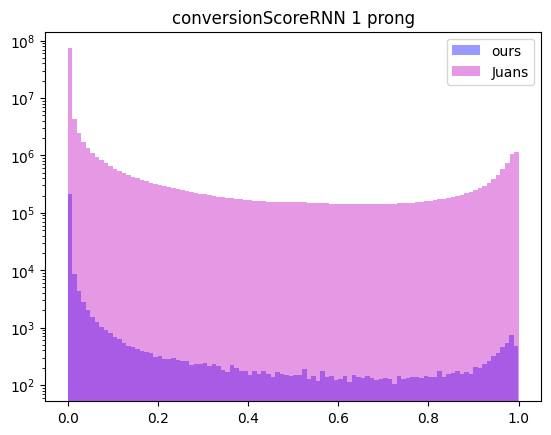

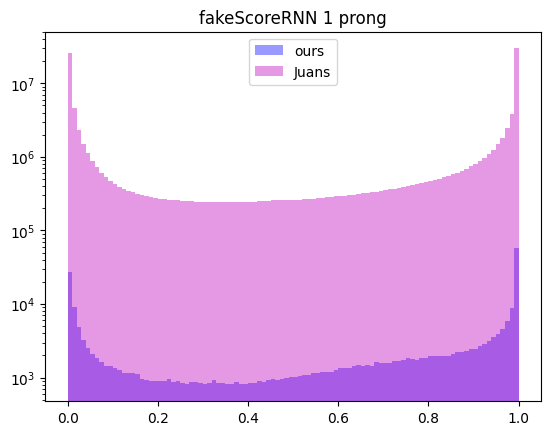

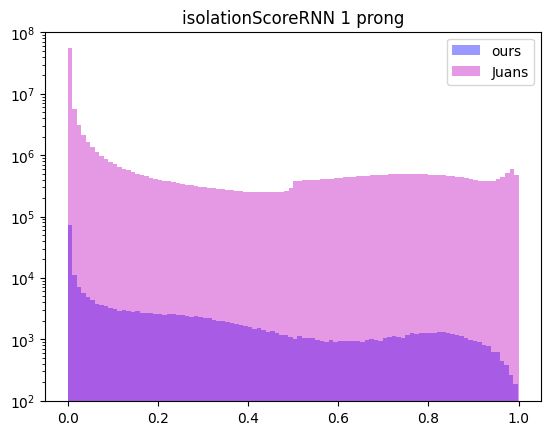

In [28]:
for i in range(len(BKG_lst)):
    plt.figure()
    if i < 4 :
        b1 = np.array(test_file['jets'][TEST_lst[i]][is_bkg & (prongs == 1)])
        b2 = np.array(bkg1['TauJets'][BKG_lst[i]])
    else:
        b1 = np.array(test_file['tracks'][TEST_lst[i]][is_bkg & (prongs == 1)])
        b2 = np.array(bkg1['TauTracks'][BKG_lst[i]])
    s1 = np.ndarray.flatten(b1)
    s2 = np.ndarray.flatten(b2)
    plt.hist(s1,bins=100,color = 'b', density = False, alpha=0.4, log = True)
    plt.hist(s2,bins=100,color = 'm', density = False, alpha=0.4, log = True)
    plt.legend(['ours','Juans'])
    #plt.yscale("log")
    plt.title(BKG_lst[i]+' 1 prong')
    plt.savefig( '1'+BKG_lst[i]+'.png')

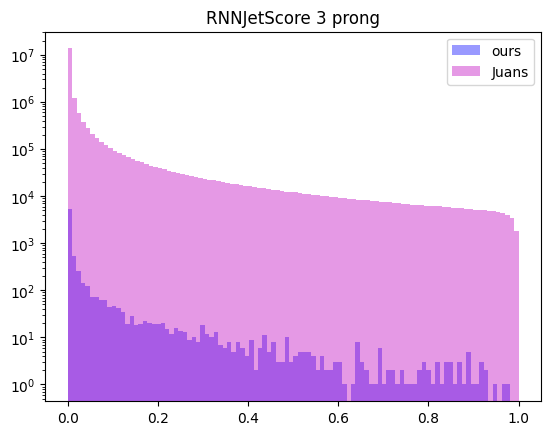

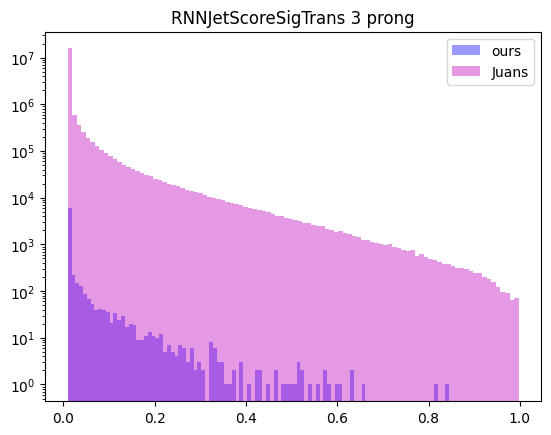

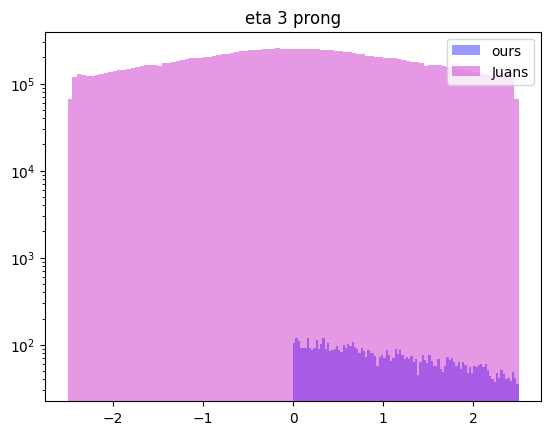

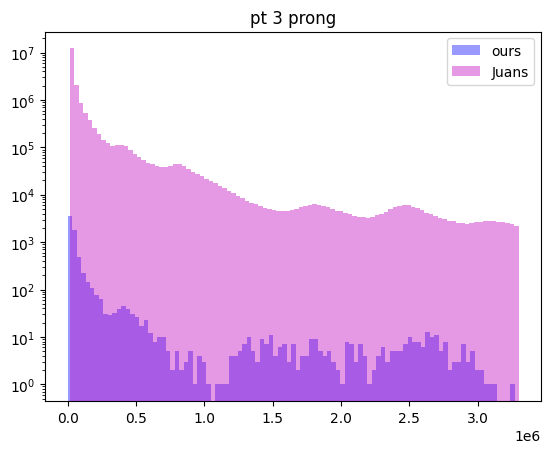

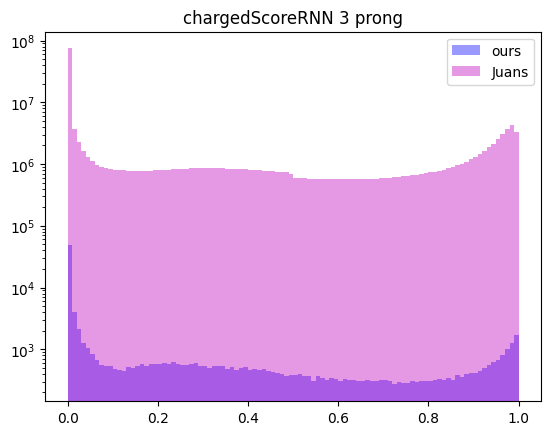

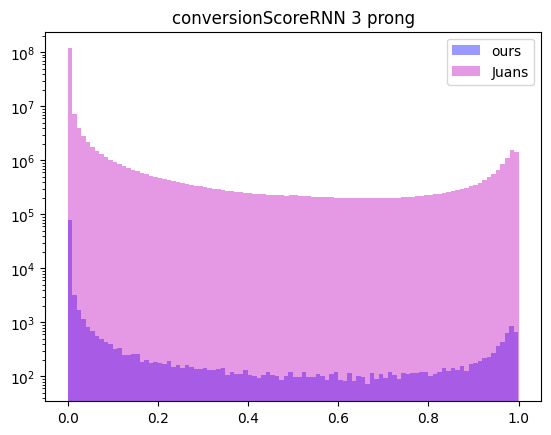

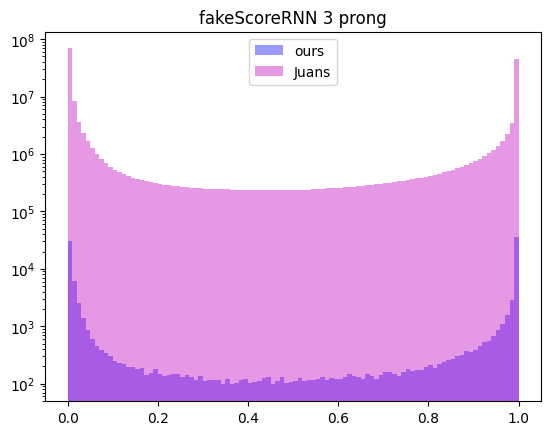

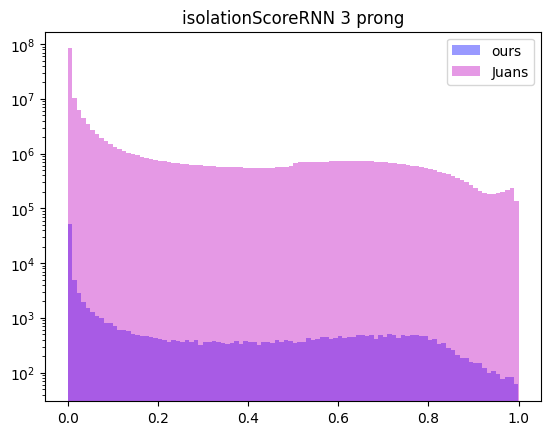

In [29]:
for i in range(len(BKG_lst)):
    plt.figure()
    if i < 4 :
        b1 = np.array(test_file['jets'][TEST_lst[i]][is_bkg & (prongs == 3)])
        b2 = np.array(bkg3['TauJets'][BKG_lst[i]])
    else:
        b1 = np.array(test_file['tracks'][TEST_lst[i]][is_bkg & (prongs == 3)])
        b2 = np.array(bkg3['TauTracks'][BKG_lst[i]])
    s1 = np.ndarray.flatten(b1)
    s2 = np.ndarray.flatten(b2)
    plt.hist(s1,bins=100,color = 'b', density = False, alpha=0.4, log = True)
    plt.hist(s2,bins=100,color = 'm', density = False, alpha=0.4, log = True)
    plt.legend(['ours','Juans'])
    #plt.yscale("log")
    plt.title(BKG_lst[i]+' 3 prong')
    plt.savefig( '3'+BKG_lst[i]+'.png')